The dimensions of the original image are: (1550, 2088, 3)


Text(0.5, 1.0, 'Original Image')

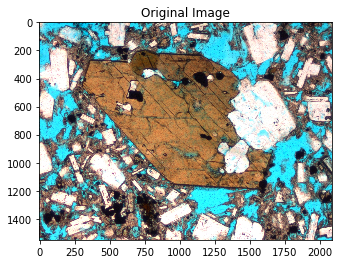

In [1]:
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
import time
from PIL import Image

start = time.time()

dat = plt.imread(
    'C:/Users/kwjan/OneDrive/Documents/thinsectionandesite.jpg')  # Insert your image here (Must use the path).
print("The dimensions of the original image are: " + str(np.shape(dat)))
plt.figure(0)
plt.imshow(dat)
plt.title('Original Image')

In order to speed up this script, I resized the image.
The dimensions of the resized image are: (371, 500, 3)


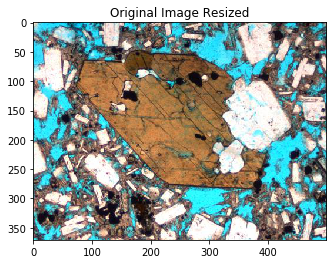

In [2]:
print("In order to speed up this script, I resized the image.")
dat = Image.open('C:/Users/kwjan/OneDrive/Documents/thinsectionandesite.jpg')
dat.thumbnail((500, 500))
dat.save('C:/Users/kwjan/OneDrive/Documents/resizedandesite.jpg')
dat = plt.imread('C:/Users/kwjan/OneDrive/Documents/resizedandesite.jpg')
print("The dimensions of the resized image are: " + str(np.shape(dat)))

plt.figure(1)
plt.imshow(dat)
plt.title('Original Image Resized')
plt.show()

There are multiple ways of filtering the image, here are a few.


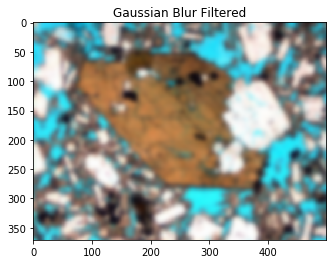

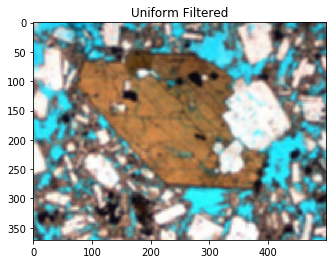

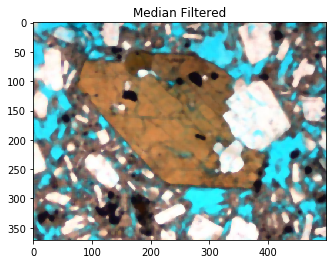

In [9]:
print("There are multiple ways of filtering the image, here are a few.")

from skimage.filters import gaussian

plt.figure(2)
color_blur = gaussian(dat, 4, multichannel=True)
plt.imshow(color_blur)
plt.title('Gaussian Blur Filtered')

plt.figure(3)
uniform = ndimage.uniform_filter(dat, size=(7, 7, 1))
plt.imshow(uniform)
plt.title('Uniform Filtered')

filtdat = ndimage.median_filter(dat, size=(7, 7, 1))

plt.figure(4)
plt.imshow(filtdat)
plt.title('Median Filtered')

For this example I use the median filtered data, although the others could possibly work too.
These are the minima of the unfiltered image: [  2 202]
These are the minima of the filtered image: [ 28  81 106 202]
Significant minima of these histograms, with sufficient space between them, signify changes in colour. We will use the filtered data as it was found to be more accurate.
Going by colour as the only indicator, there are approximately 5 minerals in this thin section


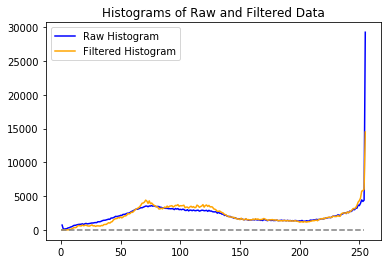

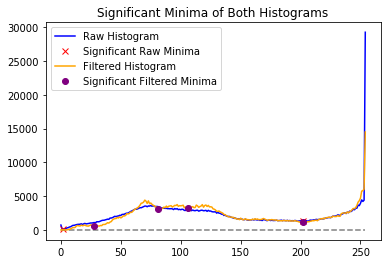

In [4]:
print('For this example I use the median filtered data, although the others could possibly work too.')

hi_dat, bins = np.histogram(dat, bins=np.arange(256))
hi_filtdat, bins = np.histogram(filtdat, bins=np.arange(256))

x = bins[1:]
y = np.array(hi_dat)
yy = np.array(hi_filtdat)

# sort the data in x and rearrange y accordingly
sortId = np.argsort(x)
x = x[sortId]
y = y[sortId]
yy = yy[sortId]

plt.figure(5)
rawdata = plt.plot(bins[1:], hi_dat, label="Raw Histogram",
                   color='blue')  # hi_dat would also work as the histograms are the same.
filtereddata = plt.plot(bins[1:], hi_filtdat, label="Filtered Histogram", color='orange')
plt.plot(np.zeros_like(y), "--", color="gray")
plt.title('Histograms of Raw and Filtered Data')
plt.legend(loc='best')

from scipy.signal import argrelextrema

minm = argrelextrema(y, np.less, order=15)
indices = range(len(minm[0]))
print("These are the minima of the unfiltered image: " + str(minm[0]))

minm2 = argrelextrema(yy, np.less, order=15)
indices2 = range(len(minm2[0]))
print("These are the minima of the filtered image: " + str(minm2[0]))

minimas = np.arange(len(minm[0]))
minimas2 = np.arange(len(minm2[0]))

from scipy.signal import find_peaks

plt.figure(6)
peaks, _ = find_peaks(y, height=0)
plt.title('Significant Minima of Both Histograms')
plt.plot(y, label='Raw Histogram', color='blue')
plt.plot(minm[0], hi_dat[minm], "x", label='Significant Raw Minima', color='red')
plt.plot(np.zeros_like(y), "--", color="gray")
peaks, _ = find_peaks(yy, height=0)
plt.plot(yy, label='Filtered Histogram', color='orange')
plt.plot(minm2[0], hi_filtdat[minm2], "o", label='Significant Filtered Minima', color='purple')
plt.legend(loc='best')

print('Significant minima of these histograms, with sufficient space between them, signify changes in colour. We will use the filtered '
      'data as it was found to be more accurate.')
print('Going by colour as the only indicator, there are approximately ' + str(len(minimas2) + 1) + ' minerals in this thin section')


I grouped the values of the filtered data, using these minima as points to define phases
Displaying the value and occurances of each phase: 
[[0.00000e+00 1.25901e+05]
 [2.50000e-01 1.16840e+04]
 [5.00000e-01 8.59540e+04]
 [7.50000e-01 1.97844e+05]
 [1.00000e+00 1.35117e+05]]


Text(0.5, 1.0, 'Image Filtered with Phases')

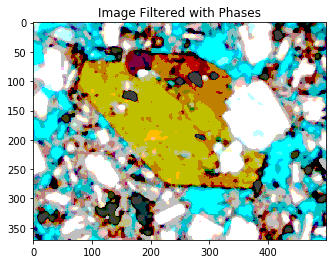

In [5]:
print("I grouped the values of the filtered data, using these minima as points to define phases")
phases = []
for number in np.arange(len(minm2[0])):
    if number == 0:
        thisphase = filtdat <= minm2[0][number]
        phases = ((number + 1) * thisphase.astype(np.int))
    elif number == np.arange(len(minm2[0]))[-1]:
        thisphase = filtdat > minm2[0][number]
        phases = phases + ((number + 1) * thisphase.astype(np.int))
    else:
        thisphase = np.logical_and(filtdat > minm2[0][number], filtdat <= minm2[0][number + 1])
        phases = phases + ((number + 1) * thisphase.astype(np.int))

phases = np.multiply(phases, 1 / len(minm2[0]))
(unique, counts) = np.unique(phases, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('Displaying the value and occurances of each phase: ')
print(frequencies)

plt.figure(7)
plt.imshow(phases)
plt.title('Image Filtered with Phases')

The ginput used opens a pop up where I just chose two random points, first in the white area and second in the light brown.
Now, choose as many points as you would like. Right click to stop the input.
[(391.58528789551144, 160.63520971302427), (209.14794885945545, 191.3471302428256)]
Enter the FOV of your image: 500
Input number 1 has coordinates 392 , 161
The corresponding colour values are  [1. 1. 1.]
This colour covers 45.9 % of the field of view.
Its total size is 229.3 .
Input number 2 has coordinates 209 , 191
The corresponding colour values are  [1.   0.75 0.  ]
This colour covers 30.1 % of the field of view.
Its total size is 150.3 .
This operation took 1973.301382780075 seconds.


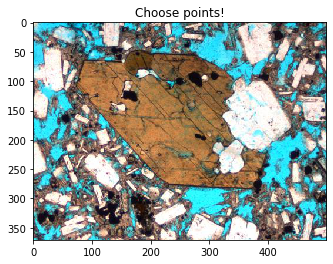

In [11]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
print('The ginput used opens a pop up where I just chose two random points, first in the white area and second in the light brown.')
print('Now, choose as many points as you would like. Right click to stop the input.')

plt.figure(8)
plt.imshow(dat)
plt.title('Choose points!')
get_input = plt.ginput(n=-1, timeout=0, mouse_pop=None, mouse_stop=3)
print(get_input)

FOV = int(input('Enter the FOV of your image: '))
check1size = frequencies[1, 0] - frequencies[0, 0]

for index in np.arange(np.shape(get_input)[0]):
    counter = 1
    ycoord = np.rint(get_input[index][0]).astype(np.int64)
    xcoord = np.rint(get_input[index][1]).astype(np.int64)
    print("Input number " + str(index + 1) + " has coordinates " + str(ycoord) + " , " + str(xcoord))
    colour = phases[np.round(xcoord), np.round(ycoord)]
    print("The corresponding colour values are ", colour)
    for j in np.arange(np.shape(phases)[0]):
        for k in np.arange(np.shape(phases)[1]):
            check1 = np.all(np.abs(phases[j, k] - colour) <= [check1size*2, check1size*2, check1size*2])
            check2 = np.logical_or(np.any(np.logical_and(phases[j, k] != 0, colour != 0)),
                                   np.all(np.logical_and(phases[j, k] == 0, colour == 0)))
            if check1:
                counter = counter + 1
    percentage = (counter / (np.shape(dat)[0] * np.shape(dat)[1])) * 100
    size = FOV * (percentage / 100)

    print("This colour covers " + str(np.round(percentage, decimals=1)) + " % of the field of view.")
    print("Its total size is " + str(np.round(size, decimals=1)) + " .")

end = time.time()
print("This operation took " + str(end - start) + " seconds.")